## More than Meets the Ear: The Data and Elements Behind Spotify Songs
Since its humble beginnings in Sweden, **Spotify** has continually grown exponentially to become one of, if not, the world's biggest music streaming provider. Boasting an immense catalog of tracks from around the world, the music giant has gathered mounds of valuable data, both basic and complex, behind the songs deployed in its massive database. For this Notebook, the researchers **Anjelo Antioquia**, **Gabriel Minamedez**, and **Julian Sunpayco** will report their findings in this case study centered around a dataset gathered from online data science community Kaggle related to the songs in Spotify.

This is in partial fulfillment of the course **Statistical Modelling and Simulation (CSMODEL)**.

## Import
Import Python modules. **IPython** is for an embedded HTML file in the Exploratory Data Analysis portion. **matplotlib**, **numpy**, **pandas**, **scipy**, and **sklearn** are for data handling, analysis, and visualization.

In [1]:
from IPython.display import IFrame
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
from scipy.stats import norm
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.cluster import KMeans

## Dataset: The Spotify Dataset
The [Spotify dataset](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data.csv) (titled **`data.csv`**) consists of 160,000+ tracks from 1921-2020 found in Spotify as of June 2020. Collected by Kaggle user and Turkish Data Scientist Yamaç Eren Ay, the data was retrieved and tabulated from the **Spotify Web API**. Each row in the dataset corresponds to a track, with variables such as the title, artist, and year located in their respective columns. Aside from the fundamental variables, musical elements of each track, such as the tempo, danceability, and key, were likewise extracted; the algorithm for these values were generated by Spotify based on a range of technical parameters.

Let's bring in that dataset now:

In [2]:
main_df = pd.read_csv("./data.csv")
main_df.head()

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.995,0.708,0.1950,0.563,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.994,0.379,0.0135,0.901,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.604,0.749,0.2200,0.000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.995,0.781,0.1300,0.887,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.990,0.210,0.2040,0.908,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0


With a huge array of variables present as seen above, it may seem overwhelming, but don't be! Together, these variables describe a track in each row, giving each some interesting numerical context across different parameters. Below is the list of variables and their descriptions:
- **`id`**: A unique identifier for each track.
- **`name`**: The track's title.
- **`artists`**: Artist/s who participated in the track.
- **`duration_ms`**: Length of the track in milliseconds (ms).
- **`release_date`**: The track's release date in MM/DD/YYYY, or at the minimum, YYYY.
- **`year`**: The year in which the track was released.
- **`acousticness`***: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
- **`danceability`***: Describes how suitable a track is for dancing. A value of 0.0 is least danceable and 1.0 is most danceable.
- **`energy`***: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast and loud.
- **`instrumentalness`***: Predicts whether a track contains no vocals.
- **`liveness`***: Detects the presence of an audience in the recording.
- **`loudness`***: The overall loudness of a track in decibels (dB).
- **`speechiness`***: Detects the presence of spoken words in a track.
- **`tempo`***: The overall estimated tempo of a track in beats per minute (BPM).
- **`valence`***: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
- **`mode`**: Melodic content from the modality of a track. 1 = Major; 0 = Minor.
- **`key`**: The estimated overall key of a track from the [Pitch Class notation](https://en.wikipedia.org/wiki/Pitch_class). E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
- **`popularity`**: A track's popularity, 0-100 where 100 is the most popular based on [Spotify's algorithm](https://developer.spotify.com/documentation/web-api/reference/tracks/get-track/).
- **`explicit`**: Whether or not the track has explicit lyrics. 1 = True; 0 = False.

*Based on the [audio features of a track from Spotify's Web API](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/).

There are quite a lot of variables here to dissect, however, there are some columns here that will not be relevant to the following Exploratory Data Analysis and the Further Investigation and Inference on the Spotify data. For simplicity's sake, we'll drop those irrelevant variables. In this case, we'll drop the following columns, along with the reason for dropping:
- **`id`**: No further analysis can be drawn from the track's unique identifier.
- **`release_date`**: Since some of the data is incomplete (e.g. no date, no month), this will be dropped as it will be impossible to draw annual trends for time series, thus deeming this variable irrelevant. Filling in date information based on other complete dates will likewise harm the data. We will simply depend on the `year` variable for time analysis.
- **`liveness`***: It is merely a measure of whether or not a track was performed live or through a recording studio, and so the researchers deem this as a non-fundamental musical element since this does not directly measure an element of music itself.

Let's now materialize the deletion of these columns:

In [3]:
main_df.drop(["id", "release_date", "liveness"], axis=1, inplace=True)
main_df.head()

,name,artists,duration_ms,year,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,0.995,0.708,0.1950,0.563,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,0.994,0.379,0.0135,0.901,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,0.604,0.749,0.2200,0.000,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,1928,0.995,0.781,0.1300,0.887,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,0.990,0.210,0.2040,0.908,-16.829,0.0424,62.149,0.0693,1,11,1,0


Let's now check the specific information for the variables of this dataset and see if further cleaning is needed:

In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              169909 non-null  object 
 1   artists           169909 non-null  object 
 2   duration_ms       169909 non-null  int64  
 3   year              169909 non-null  int64  
 4   acousticness      169909 non-null  float64
 5   danceability      169909 non-null  float64
 6   energy            169909 non-null  float64
 7   instrumentalness  169909 non-null  float64
 8   loudness          169909 non-null  float64
 9   speechiness       169909 non-null  float64
 10  tempo             169909 non-null  float64
 11  valence           169909 non-null  float64
 12  mode              169909 non-null  int64  
 13  key               169909 non-null  int64  
 14  popularity        169909 non-null  int64  
 15  explicit          169909 non-null  int64  
dtypes: float64(8), int64

With 169,909 tracks in total and every variable filled, it's looking good so far! However, let's dig in some more just in case there are anomalies with the data themselves. Let's use the `pd.Series.unique()` function to check the variables with limited choices of possible values (rules indicated in comments for each print statement):

In [5]:
print(main_df["mode"].unique()) # Should be either 0 or 1
print(main_df["key"].unique()) # Should be values from 0 to 11
print(main_df["explicit"].unique()) # Should be either 0 or 1

[1 0]
[10  8  5  1 11  6  9  7  4  2  3  0]
[0 1]


It looks like the variables `mode`, `key`, and `explicit` are good to go. Let's now check the variables supposedly bound within a given range:

In [6]:
print(str(main_df["year"].min()) + " – " + str(main_df["year"].max())) # Range: [1921 – 2020]
print(str(main_df["acousticness"].min()) + " – " + str(main_df["acousticness"].max())) # Range: [0.0 – 1.0]
print(str(main_df["danceability"].min()) + " – " + str(main_df["danceability"].max())) # Range: [0.0 – 1.0]
print(str(main_df["energy"].min()) + " – " + str(main_df["energy"].max())) # Range: [0.0 – 1.0]
print(str(main_df["instrumentalness"].min()) + " – " + str(main_df["instrumentalness"].max())) # Range: [0.0 – 1.0]
print(str(main_df["speechiness"].min()) + " – " + str(main_df["speechiness"].max())) # Range: [0.0 – 1.0]
print(str(main_df["valence"].min()) + " – " + str(main_df["valence"].max())) # Range: [0.0 – 1.0]
print(str(main_df["popularity"].min()) + " – " + str(main_df["popularity"].max())) # Range: [0 – 100]

1921 – 2020
0.0 – 0.996
0.0 – 0.988
0.0 – 1.0
0.0 – 1.0
0.0 – 0.9690000000000001
0.0 – 1.0
0 – 100


The ranges are all as expected. However, let's check to see if there are any duplicate rows that might skew our data a certain way:

In [7]:
main_df[main_df.duplicated()]

,name,artists,duration_ms,year,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
609,"Rhapsody on a Theme of Paganini, Op.43: Variat...","['Sergei Rachmaninoff', 'William Kapell', 'Fri...",61467,1945,0.98300,0.635,0.0123,0.955000,-27.297,0.0521,83.046,0.610,1,0,0,0
652,Interview with William Kapell,['William Kapell'],1325093,1945,0.91300,0.704,0.2230,0.000000,-24.480,0.9350,112.485,0.403,0,2,0,0
3344,Give Me Your Love (Love Song),['Curtis Mayfield'],260333,1972,0.12800,0.591,0.6370,0.019500,-9.102,0.0887,172.452,0.962,0,5,26,0
8094,Enamórate De Alguien Más,['Morat'],230040,2020,0.46000,0.591,0.6590,0.000000,-5.464,0.0332,145.997,0.622,1,11,2,0
8169,"Danse macabre, S. 555 (after Camille Saint-Saens)","['Franz Liszt', 'Vladimir Horowitz']",491333,1928,0.99300,0.303,0.2260,0.826000,-21.483,0.0444,67.013,0.146,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164200,My Prayer,['Roy Orbison'],164467,1963,0.83800,0.493,0.2170,0.004630,-11.501,0.0271,105.003,0.182,1,9,20,0
166015,Bonzo's Montreux - 2012 Remaster,['Led Zeppelin'],262147,1982,0.21300,0.291,0.9750,0.908000,-10.754,0.0557,180.289,0.127,0,6,33,0
168041,Shiver,['Maroon 5'],179773,2002,0.04210,0.625,0.9250,0.000000,-4.435,0.3420,172.017,0.515,1,0,47,0
169035,Video Games - Remastered,['Lana Del Rey'],281947,2012,0.80600,0.390,0.2550,0.000001,-9.676,0.0299,122.056,0.179,0,6,50,0


Based on the table above, there are 607 rows of duplicated data (not counting the first recorded instance for each). It's best to drop these rows since multiple instances of the same song will compromise our Exploratory Data Anaylsis and Research in searching for trends. We shall use `drop_duplicates` for that:

In [8]:
main_df.drop_duplicates(inplace=True)
main_df[main_df.duplicated()]

,name,artists,duration_ms,year,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit


After dropping the duplicates, the empty table above indicates that they have completely been removed from our dataset. Looks like this dataset is officially good to go for analysis! We can now move on to the **Exploratory Data Analysis** with the Spotify tracks.

# Exploratory Data Analysis (EDA) on Spotify Data
Being datasets teeming with variables, the researchers have the opportunity to identify trends in the musical elements. It may be in the form of an evolutionary timeline of musical elements between decades. It may also be a comparison of musical elements among genres. From the data, the researchers may also determine assumptions on musical evolution.

The researchers have already done a comprehensive data analysis of the dataset, with the help of the [Pandas Profiling Python module](https://towardsdatascience.com/exploratory-data-analysis-with-pandas-profiling-de3aae2ddff3) that aids specifically for exploratory data analysis. It gives a detailed exploratory approach at the data, offering visualizations of the summary statistics, correlations, possible warnings, and much more.

However, with the interest of the project specifications, we will no longer be doing a descriptive deep dive in every summary statistic for this Notebook. Rather, embedded below is the **`spotify_eda.html`** file produced from the aforementioned Pandas Profiling module for you to explore:

In [9]:
IFrame(src="./spotify_eda.html", width=900, height=500)

From the explored data, the researchers have formulated three of the most interesting EDA questions that could aid us in our further research, starting with...

### EDA #1: The evolution of different musical elements through the years.
Given the different musical elements provided, it will be interesting to see how these facets have evolved through the years. Are songs faster in pace now?  Has autotune really taken over the industry? How about the general tone of the songs?

The researchers made the call of handpicking 6 of the 8 musical elements, namely `acousticness`, `danceability`, `energy`, `instrumentalness`, `speechiness`, and `valence` given that these fields are measured at the same confidence range of 0.0 – 1.0. The `loudness` and `tempo`, meanwhile, are measured differently in decibels (dB) and beats per minute (BPM), respectively.

We then create a line graph for each element in order to display the mean values (by year) of the elements present in all songs grouped through the years. Since we have 6 elements to explore, we should have 6 line graphs in total, plotted in a subplot `sp1` (a feature of the **matplotlib** module to show multiple graphs in one cell):

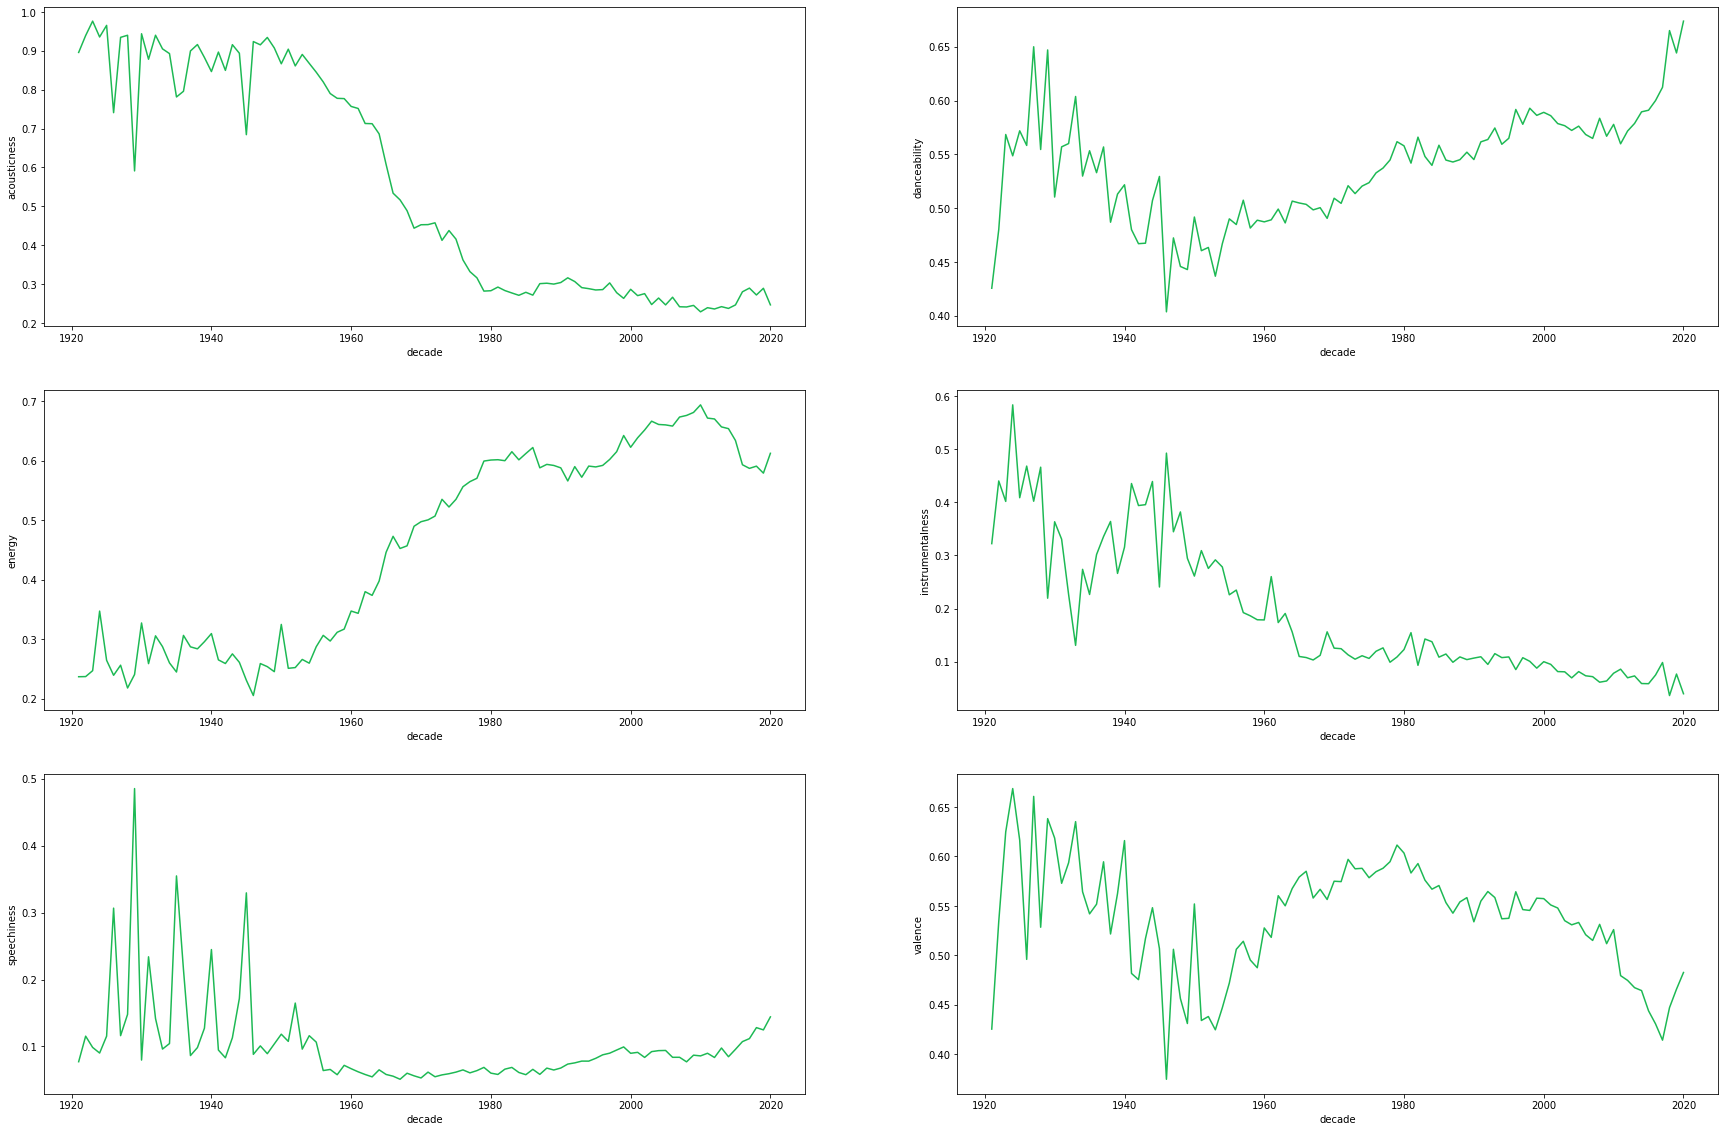

In [10]:
sp1, elements = plt.subplots(3, 2) # Initiate the subplots

arrElements = ["acousticness", "danceability", "energy", "instrumentalness", "speechiness", "valence"]
row = 0
col = 0

for elem in arrElements: # Produce a line graph for each musical element
    main_df.groupby("year")[elem].mean().plot(ax=elements[row][col], figsize=(30,20), color="#1db954") # Group rows by year and get the mean values for that particular element
    elements[row][col].set_xlabel("decade")
    elements[row][col].set_ylabel(elem)
    if col == 0:
        col = 1
    elif row == 0 and col == 1:
        row = 1
        col = 0
    elif row == 1 and col == 1:
        row = 2
        col = 0

Quite a lot of graphs to unpack here, but let's run through them one by one and make some discoveries on the data.

First and foremost, we can see a dramatic decrease in the areas of `acousticness` and `instrumentalness` through the years. These could be attributed to the **rise of electrical and electronic music in the mid-20th century**. For both elements, we see a gradual decrease in the 50's, followed by a sharp fall beginning in the 60's – a decade of musical breakthroughs with the rise of [synthesizers in music production](https://www.timetoast.com/timelines/history-of-electronic-music-timeline) and [rock music](https://www.rollingstone.com/music/music-features/bob-dylan-the-beatles-and-the-rock-of-the-sixties-176221/). This adversely affected the `energy` element, which saw a drastic upward trend in about the same time. This is because higher energy levels are typically attributed to having traits of being fast and noisy, scoring high in genres such as **death metal** and **electronic dance music (EDM)**.

`danceability` has sustained generally high levels in music through the years, however, there is a noticeable drop in the mid-40's to 50's. This was probably a side-effect of [post-war modernism](https://www.theguardian.com/music/tomserviceblog/2013/oct/04/music-in-the-post-second-war-world-tom-service), where music gravitated upon a more somber, heroic tone to fit the mood of the wake of **World War 2**, the deadliest war in history.

Similar to danceability, `valence`, which is a measure of how positive (i.e. happy) a song is, it likewise saw a sharp decrease in the post-war era. It saw an upward trend, particularly around the mid-50's to 70's that could have been because of the [hippie music that had its moment as an opposing force of peace to the United States' involvement in the Vietnam War](https://www.britannica.com/topic/hippie).

### EDA #2: The divide between explicit and non-explicit songs through the years.
There has been a significant uptick in songs containing explicit lyrics, with the rise of more liberal and experimental approaches to music as a form of expression. For this analysis, we aim to compare the trend between explicit and non-explicit songs through the years.

Let's start by creating a stacked bar plot to discern differences in the explicitness of the songs:

Text(0.5, 1.0, 'Bar plot of explicit vs. non-explicit songs on Spotify through the years.')

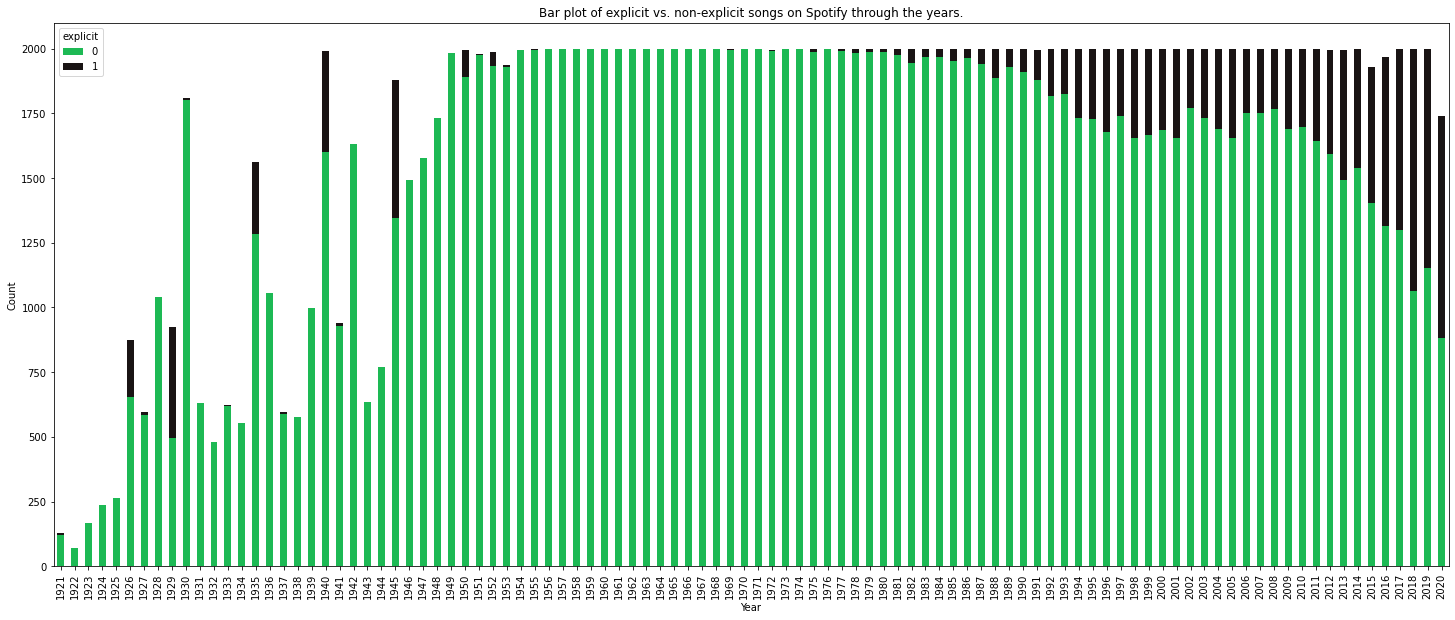

In [11]:
main_df.groupby(["year", "explicit"]).size().unstack().plot(kind="bar", stacked="True", figsize=(25,10), color=["#1db954", "#191414"])
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Bar plot of explicit vs. non-explicit songs on Spotify through the years.")

Based on the bar plot where '0' corresponds to non-explicit songs and vice versa, there's a noticeable development of the amount of explicit songs particularly in the entrance of the 90's, a trend that has sustained in favor of explicit songs until the present year. let's tabulate that data to see the actual numbers:

In [12]:
pd.set_option('display.max_columns', None) # Jupyter display setting
pd.set_option('display.expand_frame_repr', False) # Jupyter display setting
pd.set_option('max_colwidth', None) # Jupyter display setting
explicits = main_df.groupby("explicit")["year"].value_counts() # Get the count between explicit and non-explicit songs by year
pd.DataFrame([explicits[0], explicits[1]], index=["not explicit", "explicit"]) # Convert to DataFrame

year,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
not explicit,121.0,72.0,169.0,237.0,263.0,655.0,584.0,1039.0,494.0,1803.0,630.0,479.0,620.0,554.0,1285.0,1054.0,589.0,576.0,999.0,1601.0,928.0,1631.0,634.0,768.0,1344.0,1493.0,1579.0,1730.0,1982.0,1890.0,1974.0,1934.0,1929.0,1996.0,1995.0,1999.0,2000.0,2000.0,2000.0,1999.0,2000.0,2000.0,1998.0,1997.0,1997.0,2000.0,1999.0,2000.0,1995.0,1997.0,1998.0,1992.0,1998.0,1998.0,1988.0,1998.0,1990.0,1984.0,1985.0,1986.0,1974.0,1945.0,1967.0,1966.0,1953.0,1965.0,1940.0,1885.0,1927.0,1909.0,1877.0,1816.0,1824.0,1730.0,1729.0,1677.0,1740.0,1653.0,1668.0,1684.0,1655.0,1770.0,1730.0,1690.0,1654.0,1753.0,1752.0,1765.0,1689.0,1698.0,1642.0,1591.0,1491.0,1540.0,1402.0,1313.0,1301.0,1063.0,1152.0,881.0
explicit,7.0,NaN,NaN,NaN,NaN,219.0,12.0,NaN,430.0,8.0,NaN,NaN,2.0,NaN,277.0,NaN,7.0,NaN,NaN,391.0,10.0,NaN,NaN,1.0,536.0,1.0,NaN,NaN,NaN,105.0,5.0,54.0,6.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,3.0,NaN,1.0,NaN,4.0,1.0,1.0,4.0,2.0,2.0,12.0,2.0,10.0,16.0,14.0,13.0,26.0,53.0,32.0,34.0,47.0,35.0,59.0,115.0,73.0,91.0,119.0,184.0,176.0,270.0,271.0,323.0,260.0,347.0,332.0,316.0,345.0,229.0,269.0,310.0,345.0,247.0,248.0,234.0,311.0,300.0,358.0,403.0,504.0,458.0,528.0,656.0,698.0,936.0,848.0,860.0


Based on the tabulated data, the presence of explicit songs can be seen as consistent and steadily increasing since the beginning of the 80's. This could be because of the advent of [Hip-Hop music](https://www.englishclub.com/vocabulary/music-hip-hop.html) that started in the Bronx, New York City in the late 70's. Being one of the more controversial yet artistic genres for its liberal expression, Hip-Hop has garnered its fair share of criticisms due to its **explicit mentions of drugs, vices, and sex**.

Going back to the data, the notable outlier years are 1926, 1929, 1935, 1940, and 1945, being the lone years that have reached > 100 explicit tracks before the Hip-Hop era. The researchers have found that the genre of **dirty blues** rose around those times, being [earlier documents of predominantly male artists singing sexually suggestive lyrics](https://tonedeaf.thebrag.com/the-1930s-the-dirtiest-decade-in-music/). It is because of this that some musical experts have tagged the 1930's as one of the dirtiest music eras.

### EDA #3: Determining the correlation between the duration and the popularity of songs.

One of the main points of the comprehensive EDA that the researchers produced from the **Pandas Profiling** on the dataset is the correlation between numeric variables, depicted by a 2D correlation heatmap in the HTML file earlier. Among all the correlations, the researchers found the relationship between a song's duration and popularity to be intruguing. Spotify's algorithm indicates that the popularity of a track is based "on the total number of plays the track has had and how recent those plays are".

This begs the question: do people prefer shorter songs now? To visualize this, let's use a scatterplot to get a view of the correlation between the duration (in milliseconds) and the popularity of Spotify tracks:

Text(0.5, 1.0, 'Scatterplot of the duration and the popularity of Spotify tracks.')

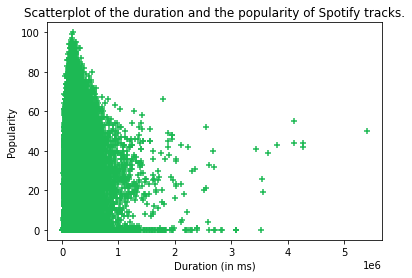

In [13]:
plt.scatter(main_df["duration_ms"], main_df["popularity"], color="#1db954", marker="+")
plt.xlabel("Duration (in ms)")
plt.ylabel("Popularity")
plt.title("Scatterplot of the duration and the popularity of Spotify tracks.")

At first glance, there appears to be little to no correlation since there is no noticeable diagonal line between the two variables. However, we can do some mathematical computations to have a solid number on the correlation of the values.

We can use **Pearson's correlation** to measure the linear correlation. Using the **scipy** module, the Pearson's correlation coefficient (PCC) is as follows:

In [14]:
pcc, _ = pearsonr(main_df["duration_ms"], main_df["popularity"]) 
pcc

0.06336510409565671

A PCC close or equal to the absolute value of 1 means that there is a linear relationship between the two variables, so in the case of the value 0.06336510409565671 between variables `duration_ms` and `popularity`, we can say that there is no linear relationship between the two.

## Further Investigation and Inference (FII) on Spotify Data

### FII #1: Determine if there is a significant difference in popularity between explicit and non-explicit songs.

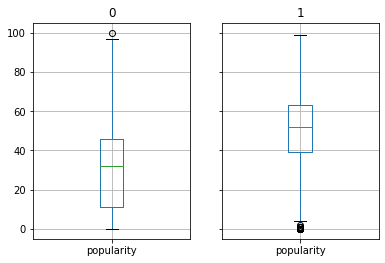

In [15]:
main_df.groupby("explicit").boxplot(column="popularity")
plt.show()

In [16]:
main_df.groupby("explicit").agg({"popularity": ["mean", "median", "std", len]})

popularity                          
               mean median        std     len
explicit                                     
0         30.255052     32  20.909213  154890
1         46.735359     52  22.454995   14412

In [17]:
46.726749 - 30.149842

16.576907

In [18]:
ttest_ind(main_df[main_df["explicit"] == 0]["popularity"], main_df[main_df["explicit"] == 1]["popularity"], equal_var = False)

Ttest_indResult(statistic=-84.75522692661204, pvalue=0.0)

null hypo: no difference, alter hypo: there is difference; since pvalue < 0.05, we can reject null hypo and say that popularity is indeed higher for explicit songs w/ value of 16.576907

### FII #2: Finding the confidence interval for the duration of the most popular songs.

In [19]:
np.percentile(main_df["popularity"], 75)

48.0

In [20]:
only75_df = main_df.query("popularity >= 48")
only75_df.describe()

,duration_ms,year,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
count,4.387700e+04,43877.000000,43877.000000,43877.000000,43877.000000,43877.000000,43877.000000,43877.000000,43877.000000,43877.000000,43877.000000,43877.000000,43877.000000,43877.000000
mean,2.341112e+05,2003.323974,0.274910,0.590713,0.621577,0.069507,-8.166745,0.086924,120.547428,0.516181,0.674499,5.242359,58.338218,0.193678
std,8.098791e+04,14.653238,0.293926,0.170832,0.227523,0.211959,4.683182,0.094283,30.318373,0.252884,0.468567,3.561133,8.060800,0.395184
min,3.030100e+04,1928.000000,0.000000,0.000000,0.000020,0.000000,-54.376000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,0.000000
25%,1.919040e+05,1996.000000,0.027400,0.482000,0.474000,0.000000,-9.856000,0.034300,96.412000,0.316000,0.000000,2.000000,52.000000,0.000000
50%,2.243330e+05,2008.000000,0.155000,0.601000,0.648000,0.000007,-7.035000,0.046900,119.800000,0.515000,1.000000,5.000000,57.000000,0.000000
75%,2.626130e+05,2015.000000,0.465000,0.715000,0.802000,0.001600,-5.166000,0.090700,140.018000,0.721000,1.000000,8.000000,64.000000,0.000000
max,5.403500e+06,2020.000000,0.996000,0.988000,1.000000,1.000000,1.342000,0.955000,243.372000,1.000000,1.000000,11.000000,100.000000,1.000000


In [21]:
only75_sample_df = only75_df.sample(n=50, random_state=1)
agg = only75_sample_df.agg({"duration_ms": ["mean", "std"]})
mean = agg.loc["mean"][0]
std = agg.loc["std"][0]

In [22]:
# Get z-score for the 95% confidence interval
z_star_95 = norm.ppf(0.975)
z_star_95

1.959963984540054

In [23]:
# Compute for the margin of error
moe = z_star_95 * (std / np.sqrt(len(only75_sample_df)))
moe

16948.86613761531

In [24]:
# Get the minimum value in the range
minim = mean - moe
minim

218760.7338623847

In [25]:
# Get the maximum value in the range
maxim = mean + moe
maxim

252658.46613761532

filter popularity getting only those greater than or equal to 75% percentile; get confidence interval of duration, see if mean is within range, and draw an analysis that average length songs are indeed more popular

### FII #3: Finding the most frequent emotions in Spotify tracks based on the track's mode and key.

In [26]:
agg_values = []

for i in range(2):
    mode_df = main_df.query("mode == @i")
    for j in range (12):
        modekey_df = mode_df.query("key == @j")
        agg_values.append([i, j, len(modekey_df), len(modekey_df)/len(main_df), len(modekey_df)/len(mode_df)])
        
agg_df = pd.DataFrame(columns=["mode", "key", "support(mode, key)", "support %", "confidence(mode -> key)"], data=agg_values)
agg_df

,mode,key,"support(mode, key)",support %,confidence(mode -> key)
0,0,0,4104,0.024241,0.083207
1,0,1,3355,0.019817,0.068021
2,0,2,4082,0.024111,0.082761
3,0,3,1580,0.009332,0.032034
4,0,4,5539,0.032717,0.112301
5,0,5,5516,0.032581,0.111834
6,0,6,3599,0.021258,0.072968
7,0,7,4040,0.023863,0.081909
8,0,8,1965,0.011606,0.039839
9,0,9,5640,0.033313,0.114348


https://ledgernote.com/blog/interesting/musical-key-characteristics-emotions/

In [27]:
agg_df["mode"] = agg_df["mode"].map({0: "Minor", 1: "Major"})
agg_df["key"] = agg_df["key"].map({0: "C", 1: "C#, Db", 2: "D", 3: "D#, Eb", 4: "E", 5: "F", 6: "F#, Gb", 7: "G", 8: "G#, Ab", 9: "A",10: "A#, Bb", 11: "B"})
agg_df["emotion"] = pd.Series(["Innocently Sad, Love-Sick", "Despair, Wailing, Weeping", "Serious, Pious, Ruminating", "Deep Distress, Existential Angst", "Effeminate, Amorous, Restless", "Obscure, Plaintive, Funereal", "Gloomy, Passionate Resentment", "Discontent, Uneasiness", "Grumbling, Moaning, Wailing", "Tender, Plaintive, Pious", "Terrible, the Night, Mocking", "Solitary, Melancholic, Patience", "Innocently Happy", "Grief, Depressive", "Triumphant, Victorious War-Cries", "Cruel, Hard, Yet Full of Devotion", "Quarrelsome, Boisterous, Incomplete Pleasure", "Furious, Quick-Tempered, Passing Regret", "Conquering Difficulties, Sighs of Relief", "Serious, Magnificent, Fantasy", "Death, Eternity, Judgement", "Joyful, Pastoral, Declaration of Love", "Joyful, Quaint, Cheerful", "Harsh, Strong, Wild, Rage"])
agg_df

,mode,key,"support(mode, key)",support %,confidence(mode -> key),emotion
0,Minor,C,4104,0.024241,0.083207,"Innocently Sad, Love-Sick"
1,Minor,"C#, Db",3355,0.019817,0.068021,"Despair, Wailing, Weeping"
2,Minor,D,4082,0.024111,0.082761,"Serious, Pious, Ruminating"
3,Minor,"D#, Eb",1580,0.009332,0.032034,"Deep Distress, Existential Angst"
4,Minor,E,5539,0.032717,0.112301,"Effeminate, Amorous, Restless"
5,Minor,F,5516,0.032581,0.111834,"Obscure, Plaintive, Funereal"
6,Minor,"F#, Gb",3599,0.021258,0.072968,"Gloomy, Passionate Resentment"
7,Minor,G,4040,0.023863,0.081909,"Discontent, Uneasiness"
8,Minor,"G#, Ab",1965,0.011606,0.039839,"Grumbling, Moaning, Wailing"
9,Minor,A,5640,0.033313,0.114348,"Tender, Plaintive, Pious"


### FII #4: Determining the classifications of the Spotify tracks through K-Means Clustering.

https://www.blisshq.com/music-library-management-blog/2011/01/25/fundamental-music-genre-list/

In [28]:
clustering_df = main_df[["acousticness", "danceability", "energy", "instrumentalness", "speechiness", "valence"]]
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(clustering_df)
clustering_df["cluster"] = clusters
clustering_df

,acousticness,danceability,energy,instrumentalness,speechiness,valence,cluster
0,0.9950,0.708,0.1950,0.563000,0.0506,0.7790,3
1,0.9940,0.379,0.0135,0.901000,0.0462,0.0767,0
2,0.6040,0.749,0.2200,0.000000,0.9290,0.8800,6
3,0.9950,0.781,0.1300,0.887000,0.0926,0.7200,3
4,0.9900,0.210,0.2040,0.908000,0.0424,0.0693,0
...,...,...,...,...,...,...,...
169904,0.1730,0.875,0.4430,0.000032,0.1430,0.3060,8
169905,0.0167,0.719,0.3850,0.031300,0.0403,0.2700,8
169906,0.5380,0.514,0.5390,0.002330,0.1050,0.1530,8
169907,0.0714,0.646,0.7610,0.000000,0.0385,0.4720,7
